In [2]:
from stardist.models import  StarDist2D

StarDist2D.from_pretrained()

model = StarDist2D.from_pretrained('2D_versatile_fluo')

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


OME series: not an ome-tiff master file
OME series: not an ome-tiff master file
OME series: not an ome-tiff master file
OME series: not an ome-tiff master file
OME series: not an ome-tiff master file
OME series: not an ome-tiff master file


In [3]:
from glob import glob
from tifffile import imread
X = sorted(glob('Images/*.tif'))
X = list(map(imread,X))

OME series: not an ome-tiff master file
OME series: not an ome-tiff master file
OME series: not an ome-tiff master file
OME series: not an ome-tiff master file
OME series: not an ome-tiff master file
OME series: not an ome-tiff master file


In [6]:
from csbdeep.utils import Path, normalize
from csbdeep.io import save_tiff_imagej_compatible
axis_norm = (0,1)   # normalize channels independently

img = normalize(X[3], 1,99.8, axis=axis_norm)
labels, details = model.predict_instances(img)

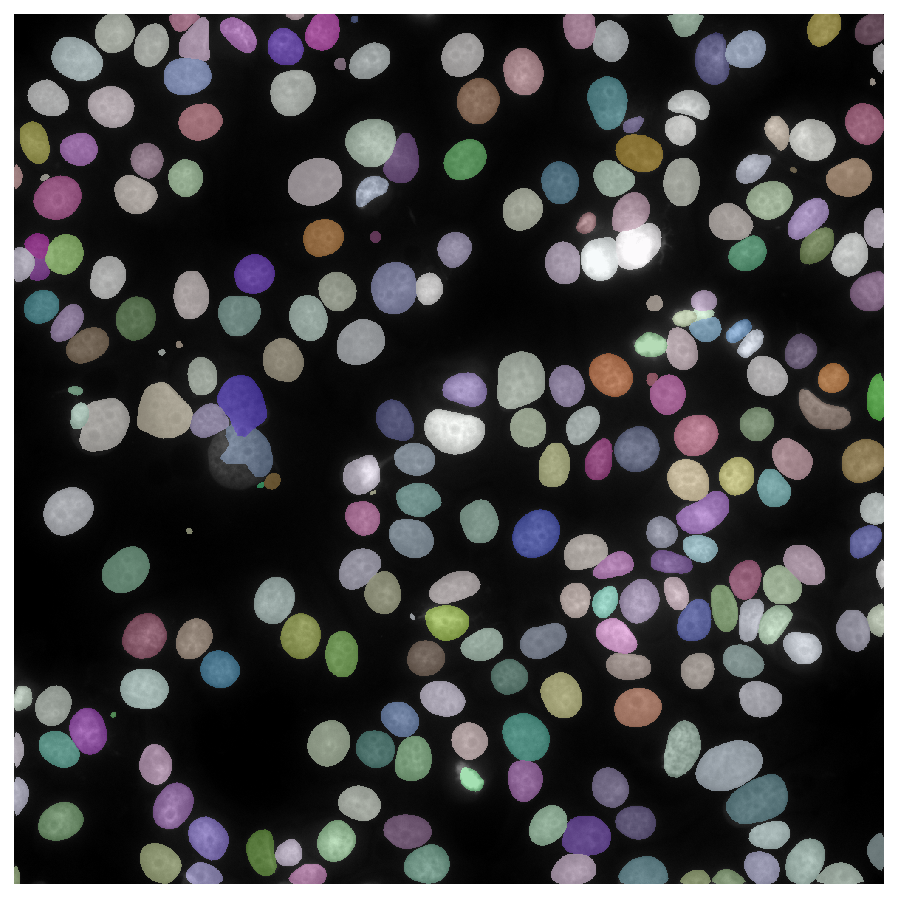

In [7]:
import matplotlib
matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
np.random.seed(6)
from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
lbl_cmap = random_label_cmap()

plt.figure(figsize=(8,8))
plt.imshow(img if img.ndim==2 else img[...,0], clim=(0,1), cmap='gray')
plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
plt.axis('off');